<a href="https://colab.research.google.com/github/kodavathi/semantic_segmentation_of_aerial_imagery/blob/main/Semantic_segmentation_of_satellite_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 4 root root 4.0K May 29  2020 'Tile 1'
drwx------ 4 root root 4.0K May 29  2020 'Tile 2'
drwx------ 4 root root 4.0K May 29  2020 'Tile 3'
drwx------ 4 root root 4.0K May 29  2020 'Tile 4'
drwx------ 4 root root 4.0K May 29  2020 'Tile 5'
drwx------ 4 root root 4.0K May 29  2020 'Tile 6'
drwx------ 4 root root 4.0K May 29  2020 'Tile 7'
drwx------ 4 root root 4.0K May 29  2020 'Tile 8'
/content/drive/MyDrive/Semantic segmentation dataset/Tile 6/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 3/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 1/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 2/masks
/content/d

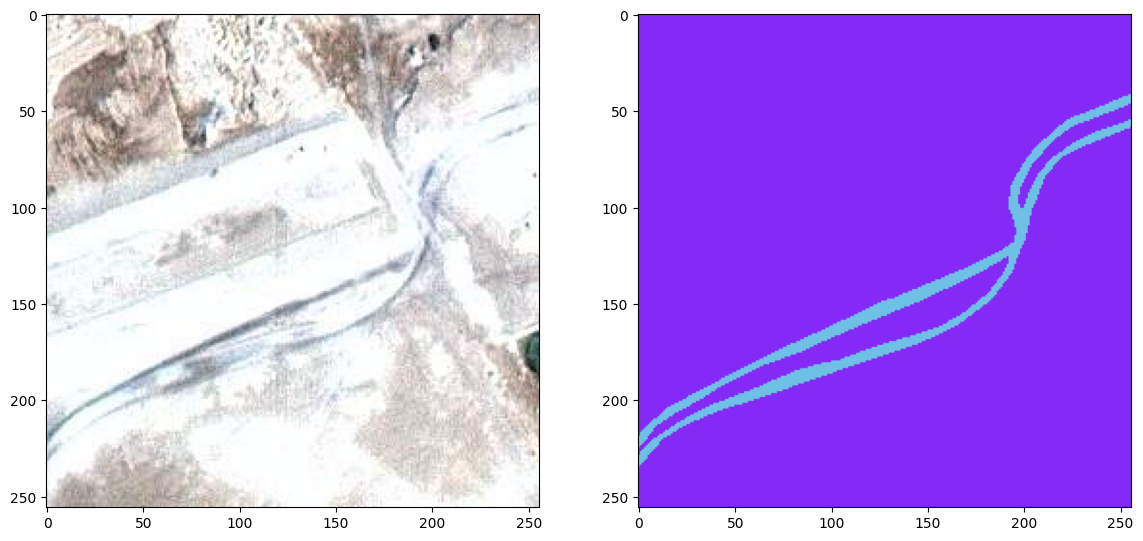

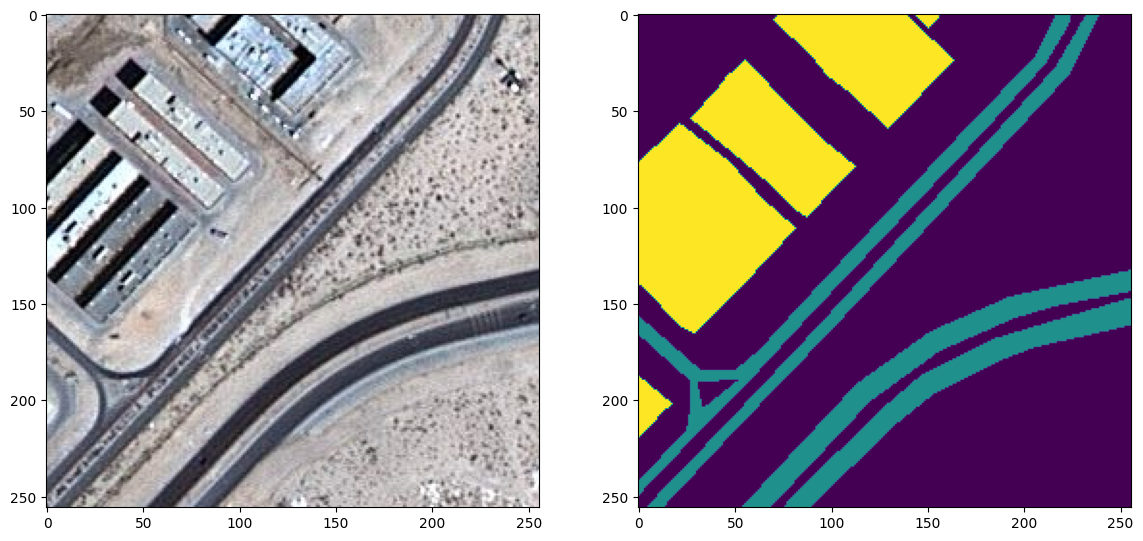

In [ ]:
!pip install patchify

import os
import cv2#image and video processing module
from PIL import Image#python image ibrary
import numpy as np#working with arrays
from patchify import patchify#library helps to split image into small,overlap patches and merge into original image
from sklearn.preprocessing import MinMaxScaler, StandardScaler#machine learning library#minmaxscalar normalize data btw(0 and 1)

from matplotlib import pyplot as plt#library for creating static,animated and intractive visualizations
import random#to get random number or element

minmaxscaler = MinMaxScaler()

from google.colab import drive
drive.mount('/content/drive')

!ls -lah '/content/drive/MyDrive/Semantic segmentation dataset'

dataset_root_folder = '/content/drive/MyDrive'

dataset_name = "Semantic segmentation dataset"

for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

image_patch_size = 256

image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)

image.shape

image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

len(image_patches)

print(image_patches.shape)

minmaxscaler = MinMaxScaler()

image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

image_y[0].shape

print(type(image))

type(Image.fromarray(image))

image.shape

(image.shape[0]//image_patch_size)*image_patch_size

image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


print(len(image_dataset))
print(len(mask_dataset))

image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

print(len(image_dataset))
print(len(mask_dataset))

type(image_dataset[0])

type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

mask_dataset.shape[0]

label = individual_patched_mask

def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

print(len(labels))

labels = np.array(labels)

labels[3]

labels = np.expand_dims(labels, axis=3)

labels[0]

np.unique(labels)

print("Total unique labels based on masks: ",format(np.unique(labels)))

random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

